## Cenário

No momento da adesao de um seguro, tenho cerca de 20 variáveis (categoricas e numericas) para mapear o perfil dos clientes na entrada, em jan/24, houveram 25000 adesoes, em fev 30000, mar 27000, abr 20000, mai 25555.

Como identifcar qual variável teve a maior variação e o que mudou entre os meses?

In [11]:
# Importa bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Simular base de dados
np.random.seed(42)
meses = ['jan/24', 'fev/24', 'mar/24', 'abr/24', 'mai/24']
n_adesoes = [25000, 30000, 27000, 20000, 25555]

In [13]:
# Criar dataframe simulado
dados = []
for mes, n in zip(meses, n_adesoes):
    for _ in range(n):
        linha = {
            'Mes': mes,
            'Var_Categ1': np.random.choice(['A', 'B', 'C']),
            'Var_Categ2': np.random.choice(['X', 'Y']),
            'Var_Num1': np.random.normal(50, 10),
            'Var_Num2': np.random.normal(100, 20)
        }
        dados.append(linha)
df = pd.DataFrame(dados)
df.head()

,Mes,Var_Categ1,Var_Categ2,Var_Num1,Var_Num2
0,jan/24,C,Y,38.881199,106.378044
1,jan/24,C,X,65.792128,115.348695
2,jan/24,B,X,44.191219,89.496604
3,jan/24,A,X,52.419623,61.734395
4,jan/24,A,X,25.608942,112.068825


In [14]:
# -------------------------------
# Analisar variáveis categóricas
# -------------------------------
variaveis_categ = ['Var_Categ1', 'Var_Categ2']
variacao_categ = {}

for var in variaveis_categ:
    distrib = df.groupby(['Mes', var]).size().groupby(level=0).apply(lambda x: x / x.sum())
    pivot = distrib.unstack(var)
    delta = pivot.diff().abs().sum().sum()
    variacao_categ[var] = delta


In [15]:
# -------------------------------
# Analisar variáveis numéricas
# -------------------------------
variaveis_num = ['Var_Num1', 'Var_Num2']
variacao_num = {}

for var in variaveis_num:
    medias = df.groupby('Mes')[var].mean()
    delta = medias.diff().abs().sum()
    variacao_num[var] = delta

In [16]:
# -------------------------------
# Juntar resultados e achar o maior
# -------------------------------
resultados = pd.DataFrame({
    'Variavel': list(variacao_categ.keys()) + list(variacao_num.keys()),
    'Variacao': list(variacao_categ.values()) + list(variacao_num.values())
})

maior_variacao = resultados.sort_values('Variacao', ascending=False).iloc[0]
maior_variacao

Variavel    Var_Num2
Variacao    0.379924
Name: 3, dtype: object

In [17]:
print("Resumo das variações entre meses:")
print(resultados)
print(f"\nVariável com maior variação: {maior_variacao['Variavel']} (Variação total: {maior_variacao['Variacao']:.4f})")

Resumo das variações entre meses:
     Variavel  Variacao
0  Var_Categ1  0.032193
1  Var_Categ2  0.019830
2    Var_Num1  0.256618
3    Var_Num2  0.379924

Variável com maior variação: Var_Num2 (Variação total: 0.3799)


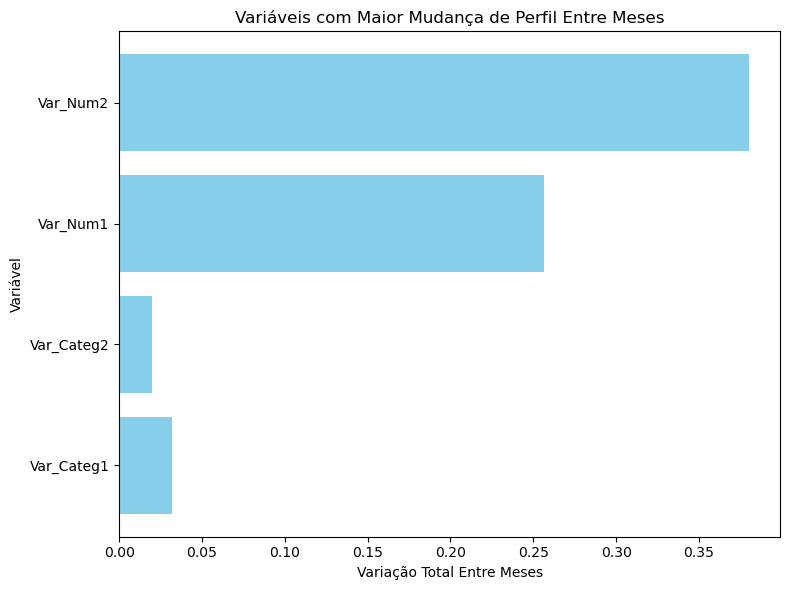

In [18]:
# Gráfico
plt.figure(figsize=(8, 6))
plt.barh(resultados['Variavel'], resultados['Variacao'], color='skyblue')
plt.xlabel('Variação Total Entre Meses')
plt.ylabel('Variável')
plt.title('Variáveis com Maior Mudança de Perfil Entre Meses')
plt.tight_layout()
plt.show()

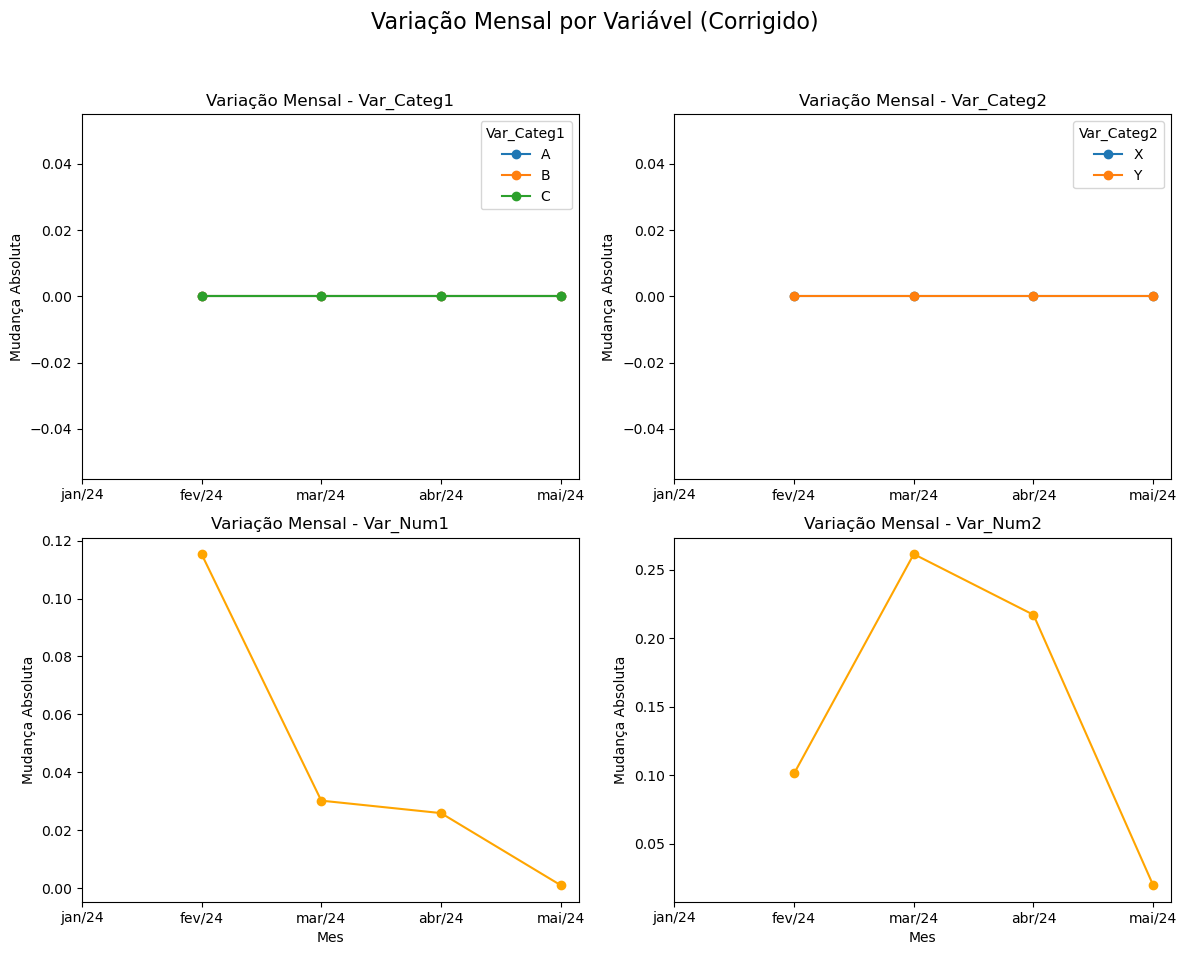

In [23]:
# Garantir que só usamos categorias presentes e ordenadas
ordem_meses = ['jan/24', 'fev/24', 'mar/24', 'abr/24', 'mai/24']

# Preparar subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Variação Mensal por Variável (Corrigido)', fontsize=16)

# Variáveis categóricas
for i, var in enumerate(variaveis_categ):
    distrib = df.groupby(['Mes', var]).size().groupby(level=0).apply(lambda x: x / x.sum())
    pivot = distrib.unstack(var)
    # Preencher valores ausentes com 0 para evitar vazios
    pivot = pivot.reindex(ordem_meses).fillna(0)
    pivot.diff().abs().plot(ax=axs[0, i], marker='o')
    axs[0, i].set_title(f'Variação Mensal - {var}')
    axs[0, i].set_ylabel('Mudança Absoluta')
    axs[0, i].set_xticks(range(len(ordem_meses)))
    axs[0, i].set_xticklabels(ordem_meses)

# Variáveis numéricas
for i, var in enumerate(variaveis_num):
    medias = df.groupby('Mes')[var].mean().reindex(ordem_meses)
    medias.diff().abs().plot(ax=axs[1, i], marker='o', color='orange')
    axs[1, i].set_title(f'Variação Mensal - {var}')
    axs[1, i].set_ylabel('Mudança Absoluta')
    axs[1, i].set_xticks(range(len(ordem_meses)))
    axs[1, i].set_xticklabels(ordem_meses)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


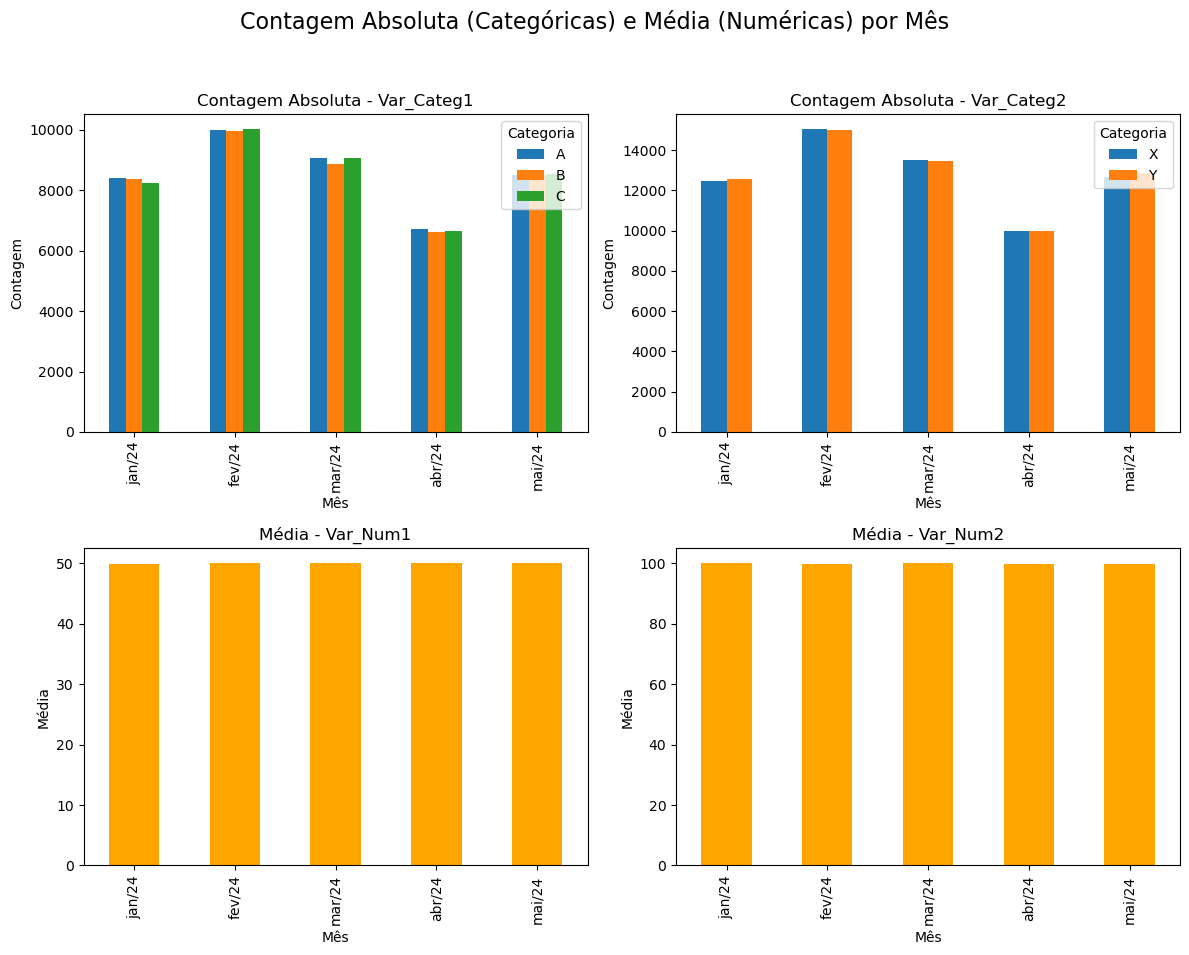

In [24]:
# Preparar subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Contagem Absoluta (Categóricas) e Média (Numéricas) por Mês', fontsize=16)

# Variáveis categóricas (contagem absoluta)
for i, var in enumerate(variaveis_categ):
    contagem = df.groupby(['Mes', var]).size().unstack(var).reindex(ordem_meses).fillna(0)
    contagem.plot(kind='bar', ax=axs[0, i])
    axs[0, i].set_title(f'Contagem Absoluta - {var}')
    axs[0, i].set_ylabel('Contagem')
    axs[0, i].set_xlabel('Mês')
    axs[0, i].legend(title='Categoria')

# Variáveis numéricas (média)
for i, var in enumerate(variaveis_num):
    media = df.groupby('Mes')[var].mean().reindex(ordem_meses)
    media.plot(kind='bar', ax=axs[1, i], color='orange')
    axs[1, i].set_title(f'Média - {var}')
    axs[1, i].set_ylabel('Média')
    axs[1, i].set_xlabel('Mês')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [25]:
# Preparar resumo automático

resumo = []

# Analisar variáveis categóricas
for var in variaveis_categ:
    contagem = df.groupby(['Mes', var]).size().unstack(var).reindex(ordem_meses).fillna(0)
    variacoes = contagem.diff().sum()
    grupo_maior_queda = variacoes.idxmin()
    valor_queda = variacoes.min()
    resumo.append(f"Na variável categórica '{var}', o grupo '{grupo_maior_queda}' teve a maior queda acumulada: {valor_queda:.0f} adesões a menos ao longo dos meses.")

# Analisar variáveis numéricas
for var in variaveis_num:
    media_mensal = df.groupby('Mes')[var].mean().reindex(ordem_meses)
    variacao_total = media_mensal.diff().sum()
    direcao = "aumento" if variacao_total > 0 else "queda"
    resumo.append(f"Na variável numérica '{var}', houve uma {direcao} acumulada de {abs(variacao_total):.2f} na média ao longo dos meses.")

# Mostrar o resumo final
print("\n📊 Resumo automatizado para área de negócios:\n")
for linha in resumo:
    print("- " + linha)



📊 Resumo automatizado para área de negócios:

- Na variável categórica 'Var_Categ1', o grupo 'A' teve a maior queda acumulada: 114 adesões a menos ao longo dos meses.
- Na variável categórica 'Var_Categ2', o grupo 'X' teve a maior queda acumulada: 244 adesões a menos ao longo dos meses.
- Na variável numérica 'Var_Num1', houve uma aumento acumulada de 0.06 na média ao longo dos meses.
- Na variável numérica 'Var_Num2', houve uma queda acumulada de 0.04 na média ao longo dos meses.


## 🔶 1️⃣ Análise de tendência (trend analysis)
Use modelos simples como regressão linear para ver se há tendência crescente ou decrescente nas categorias e médias.

Ex.: “Grupo A está caindo 10% ao mês, se continuar, desaparecerá em X meses.”

In [26]:
from sklearn.linear_model import LinearRegression
import numpy as np

for var in variaveis_categ:
    contagem = df.groupby(['Mes', var]).size().unstack(var).reindex(ordem_meses).fillna(0)
    print(f"\n📈 Tendência para {var}:")
    for cat in contagem.columns:
        y = contagem[cat].values
        X = np.arange(len(y)).reshape(-1, 1)
        model = LinearRegression().fit(X, y)
        slope = model.coef_[0]
        direction = "subindo" if slope > 0 else "descendo"
        print(f"- Categoria '{cat}' está {direction} a uma taxa média de {abs(slope):.2f} por mês")



📈 Tendência para Var_Categ1:
- Categoria 'A' está descendo a uma taxa média de 305.40 por mês
- Categoria 'B' está descendo a uma taxa média de 306.50 por mês
- Categoria 'C' está descendo a uma taxa média de 277.10 por mês

📈 Tendência para Var_Categ2:
- Categoria 'X' está descendo a uma taxa média de 453.90 por mês
- Categoria 'Y' está descendo a uma taxa média de 435.10 por mês


## 🔶 2️⃣ Análise de volatilidade (oscilação)
Meça o desvio padrão ou variabilidade mês a mês para saber quais grupos são mais instáveis.

Ex.: “O grupo B não caiu tanto, mas oscila muito — risco de perda imprevisível.”

In [27]:
for var in variaveis_categ:
    contagem = df.groupby(['Mes', var]).size().unstack(var).reindex(ordem_meses).fillna(0)
    print(f"\n📊 Volatilidade em {var}:")
    for cat in contagem.columns:
        std_dev = contagem[cat].std()
        print(f"- Categoria '{cat}' tem desvio padrão {std_dev:.2f} nas contagens")



📊 Volatilidade em Var_Categ1:
- Categoria 'A' tem desvio padrão 1198.51 nas contagens
- Categoria 'B' tem desvio padrão 1214.39 nas contagens
- Categoria 'C' tem desvio padrão 1230.49 nas contagens

📊 Volatilidade em Var_Categ2:
- Categoria 'X' tem desvio padrão 1833.66 nas contagens
- Categoria 'Y' tem desvio padrão 1807.90 nas contagens


## 🔶 3️⃣ Análise de perfil dominante por mês
→ Identificar qual grupo/categoria domina em cada mês e como isso muda.
Isso ajuda a responder perguntas como:

Qual plano, canal ou grupo é mais comum em cada mês?

Algum perfil tomou espaço de outro ao longo do tempo?

In [35]:
for var in variaveis_categ:
    dominante = df.groupby('Mes')[var].agg(lambda x: x.value_counts().idxmax())
    print(f"\n🏆 Perfil dominante por mês para {var}:")
    print(dominante)



🏆 Perfil dominante por mês para Var_Categ1:
Mes
abr/24    A
fev/24    C
jan/24    A
mai/24    C
mar/24    A
Name: Var_Categ1, dtype: object

🏆 Perfil dominante por mês para Var_Categ2:
Mes
abr/24    Y
fev/24    X
jan/24    Y
mai/24    Y
mar/24    X
Name: Var_Categ2, dtype: object


## 🔶 4️⃣ Análise de correlação entre variáveis
→ Medir como as variáveis numéricas e categóricas estão relacionadas entre si mês a mês.
Por exemplo:

Existe relação entre idade média e escolha de plano?

Produtos premium aparecem mais em algum canal específico?

In [37]:
# Exemplo simples de correlação numérica
corr = df[['Var_Num1', 'Var_Num2']].corr()
print("\n🔗 Correlação entre variáveis numéricas:")
print(corr)

# Exemplo cruzado categórico
#for var in variaveis_categ:
#    cruzado = pd.crosstab(df[var], df['Produto'], normalize='index')
#    print(f"\n🔍 Relação entre {var} e Produto:")
#    print(cruzado)



🔗 Correlação entre variáveis numéricas:
          Var_Num1  Var_Num2
Var_Num1  1.000000  0.000347
Var_Num2  0.000347  1.000000


## 🔶 5️⃣ Análise de impacto financeiro
Associe um valor financeiro médio por grupo (engajamento, ticket, receita) para simular quanto de dinheiro está sendo perdido ou mantido.

Ex.: “Os clientes que saíram entre março e abril representavam R$ 500 mil em receita anual.”

In [30]:
valores_est = {'A': 100, 'B': 200, 'C': 300, 'X': 150, 'Y': 250}  # exemplo
for var in variaveis_categ:
    contagem = df.groupby(['Mes', var]).size().unstack(var).reindex(ordem_meses).fillna(0)
    impacto = sum(contagem[col] * valores_est.get(col, 100) for col in contagem.columns)
    print(f"\n💰 Impacto financeiro estimado por mês para {var}:")
    print(impacto)



💰 Impacto financeiro estimado por mês para Var_Categ1:
Mes
jan/24    4983900
fev/24    6000400
mar/24    5398900
abr/24    3993300
mai/24    5112600
dtype: int64

💰 Impacto financeiro estimado por mês para Var_Categ2:
Mes
jan/24    5005900
fev/24    5997600
mar/24    5397500
abr/24    4000300
mai/24    5120250
dtype: int64


## 🔶 6️⃣ Análise de contribuição (Pareto)
Veja quais grupos ou variáveis concentram a maior parte das perdas (ex.: 20% dos grupos respondem por 80% da queda).

Isso ajuda a priorizar ações.



In [31]:
for var in variaveis_categ:
    total_por_cat = df[var].value_counts()
    total = total_por_cat.sum()
    contrib_pct = (total_por_cat / total * 100).sort_values(ascending=False)
    acumulado = contrib_pct.cumsum()
    print(f"\n📊 Análise de Pareto para {var}:")
    print(pd.DataFrame({'% Contribuição': contrib_pct, '% Acumulado': acumulado}))



📊 Análise de Pareto para Var_Categ1:
            % Contribuição  % Acumulado
Var_Categ1                             
A                33.485947    33.485947
C                33.314257    66.800204
B                33.199796   100.000000

📊 Análise de Pareto para Var_Categ2:
            % Contribuição  % Acumulado
Var_Categ2                             
Y                50.082709    50.082709
X                49.917291   100.000000
